In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df_pr = pd.read_csv("pr_reviews_dask.csv", delimiter=',')

In [11]:
df_pr.columns = [
  "author_login",
  "author_association",
  "body",
  "submitted_at",
  "includes_created_edit",
  "state"
]


In [4]:
df_pr

,author_login,author_association,body,submitted_at,includes_created_edit,state
0,rjzamora,MEMBER,Thanks @charlesbluca !,2024-08-23T20:42:06Z,False,APPROVED
1,phofl,COLLABORATOR,NaN,2024-08-21T13:22:08Z,False,APPROVED
2,jrbourbeau,MEMBER,Thanks @phofl,2024-08-21T13:16:55Z,False,COMMENTED
3,hendrikmakait,MEMBER,NaN,2024-08-26T14:42:21Z,False,COMMENTED
4,phofl,COLLABORATOR,NaN,2024-08-26T18:44:07Z,False,COMMENTED
...,...,...,...,...,...,...
14553,jcrist,MEMBER,NaN,2016-09-27T16:46:37Z,False,COMMENTED
14554,TomAugspurger,MEMBER,NaN,2016-09-23T15:16:18Z,False,COMMENTED
14555,mrocklin,MEMBER,NaN,2016-09-23T16:19:58Z,False,COMMENTED
14556,jcrist,MEMBER,NaN,2016-09-19T18:21:01Z,False,COMMENTED


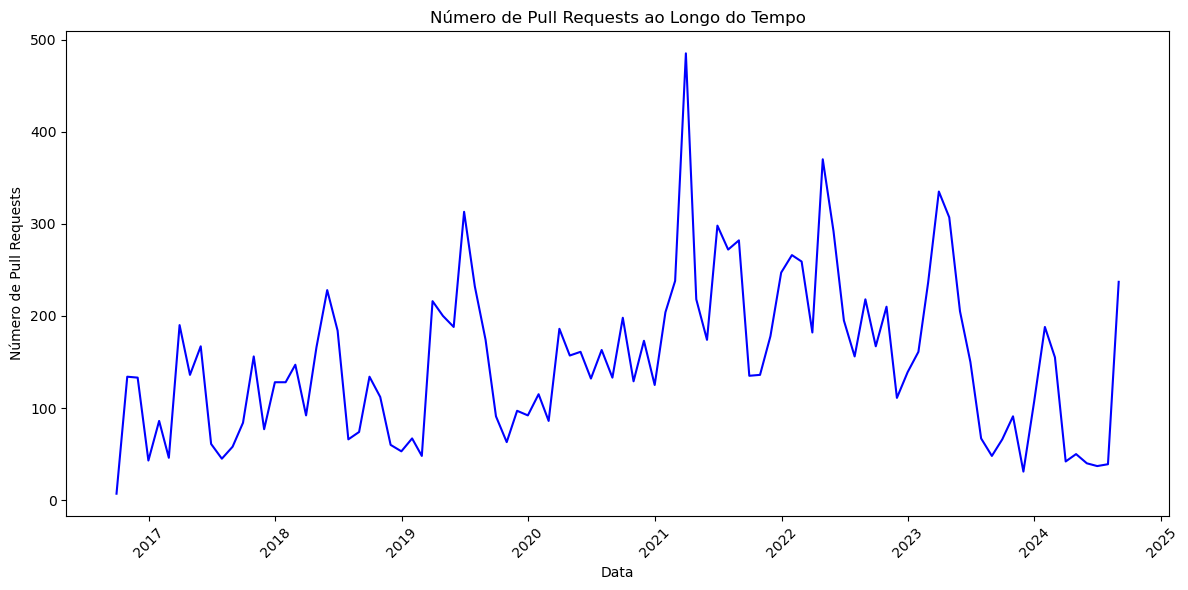

In [5]:
# Converter a coluna de data para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'], errors='coerce')

# Remover linhas onde a conversão falhou (se houver)
df_pr = df_pr.dropna(subset=['submitted_at'])

# Definir a coluna de data como índice
df_pr.set_index('submitted_at', inplace=True)

# Agrupar por mês e contar o número de pull requests
monthly_pull_requests = df_pr.resample('M').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_pull_requests.index, y=monthly_pull_requests.values, marker='', color='blue')
plt.title('Número de Pull Requests ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Pull Requests')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [11]:
contagem_nomes_df = df_pr['author_login'].value_counts().reset_index()
contagem_nomes_df.columns = ['author_login', 'frequencia']
print(contagem_nomes_df)


      author_login  frequencia
0       jrbourbeau        1985
1         mrocklin        1491
2         rjzamora        1076
3        jakirkham         989
4         jsignell         820
..             ...         ...
370        fuglede           1
371         zanieb           1
372     tmillenaar           1
373  stephaniegott           1
374        mcsoini           1

[375 rows x 2 columns]


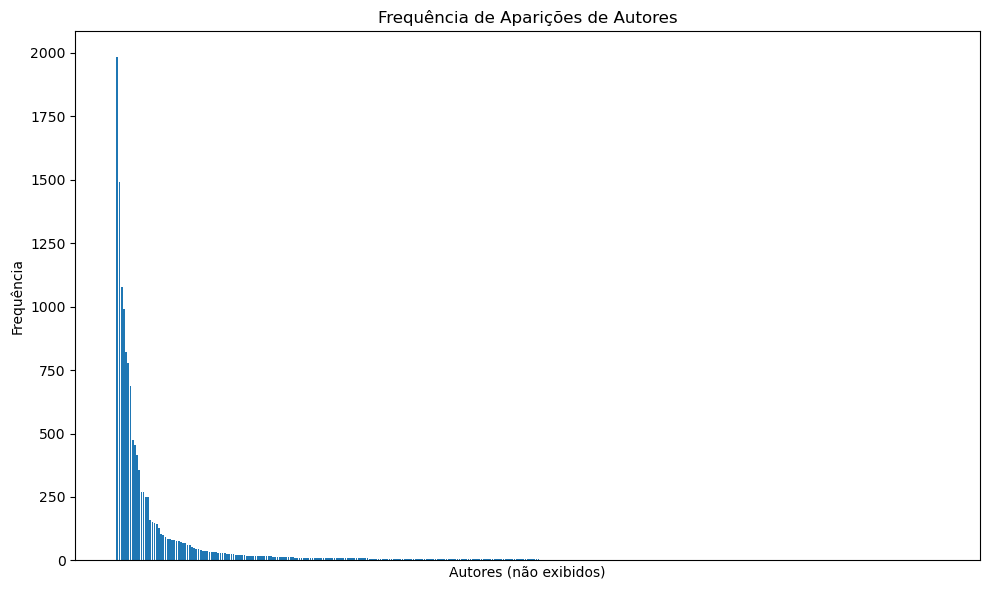

In [15]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['author_login'], contagem_nomes_df['frequencia'])

# Adicionar rótulos e título
plt.xlabel('Autores (não exibidos)')
plt.ylabel('Frequência')
plt.title('Frequência de Aparições de Autores')

# Remover os nomes do eixo X
plt.xticks([])

# Exibir o gráfico
plt.tight_layout()
plt.show()


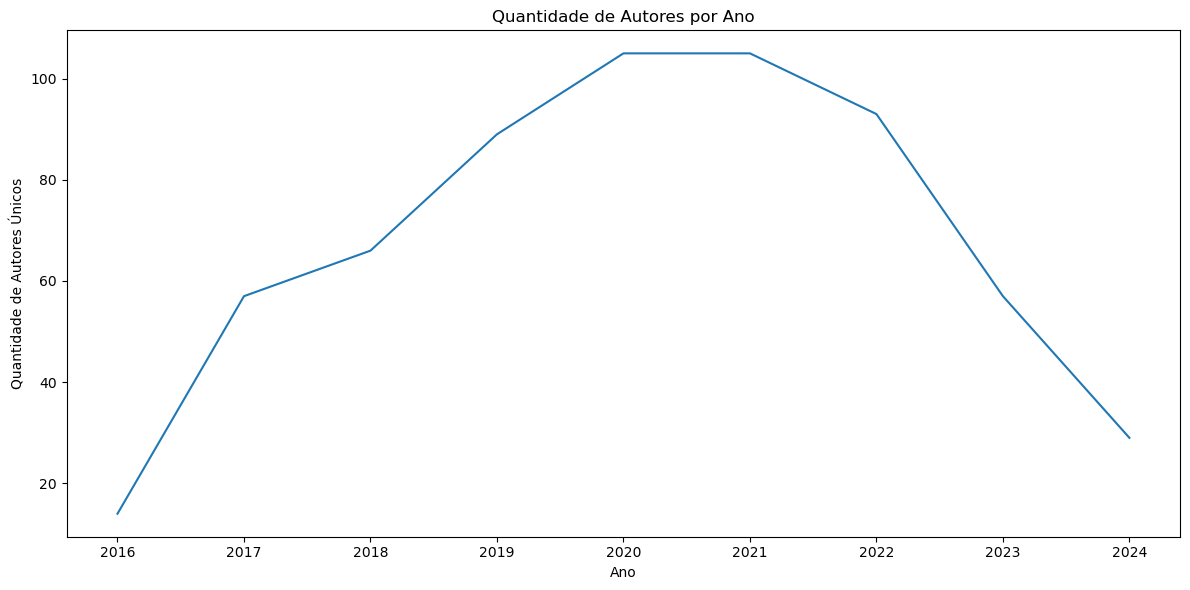

In [9]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano da coluna 'submitted_at'
df_pr['year'] = df_pr['submitted_at'].dt.year

# Contar o número de autores únicos por ano
authors_per_year = df_pr.groupby('year')['author_login'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Autores por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Para garantir que todos os anos sejam mostrados
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [16]:
contagem_nomes_df = df_pr['author_association'].value_counts().reset_index()
contagem_nomes_df.columns = ['author_association', 'frequencia']
print(contagem_nomes_df)


  author_association  frequencia
0             MEMBER       10334
1        CONTRIBUTOR        2623
2       COLLABORATOR        1400
3               NONE         201


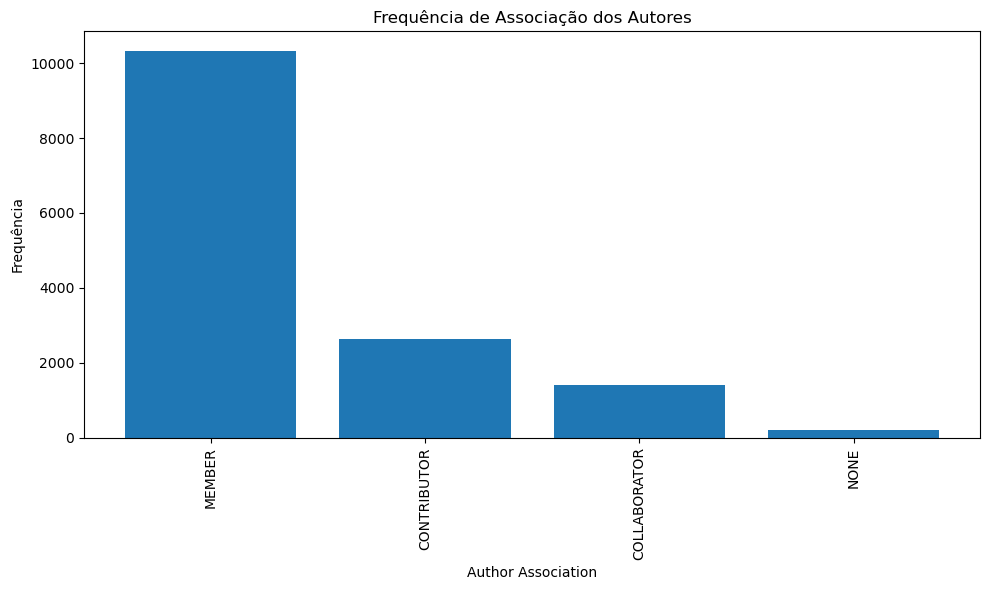

In [17]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['author_association'], contagem_nomes_df['frequencia'])

# Adicionar rótulos
plt.xlabel('Author Association')
plt.ylabel('Frequência')
plt.title('Frequência de Associação dos Autores')
plt.xticks(rotation=90)  # Rotacionar os nomes no eixo x para melhor visualização

# Exibir o gráfico
plt.tight_layout()
plt.show()


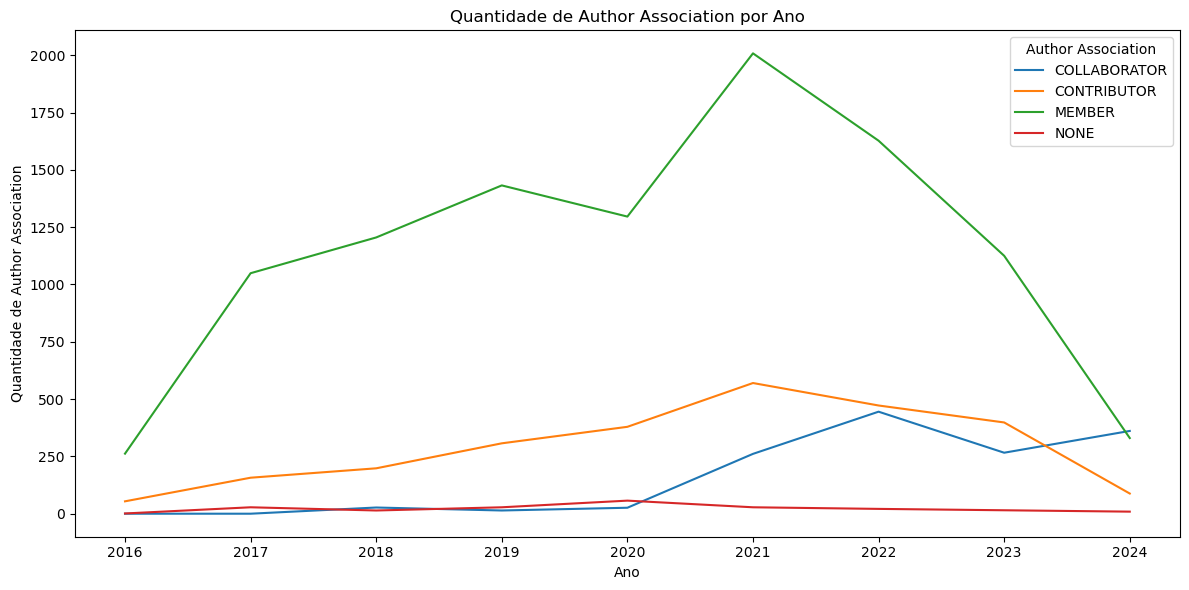

In [15]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano da coluna 'submitted_at'
df_pr['year'] = df_pr['submitted_at'].dt.year

# Contar a quantidade de author_association únicos por ano
association_counts = df_pr.groupby(['year', 'author_association']).size().unstack(fill_value=0)

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))

for association in association_counts.columns:
    plt.plot(association_counts.index, association_counts[association], marker='', linestyle='-', label=association)

plt.title('Quantidade de Author Association por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Author Association')
plt.xticks(association_counts.index)  # Para garantir que todos os anos sejam mostrados
plt.grid(False)  
plt.legend(title='Author Association')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [18]:
contagem_nomes_df = df_pr['state'].value_counts().reset_index()
contagem_nomes_df.columns = ['state', 'frequencia']
print(contagem_nomes_df)


               state  frequencia
0          COMMENTED       12270
1           APPROVED        2193
2  CHANGES_REQUESTED          87
3          DISMISSED           8


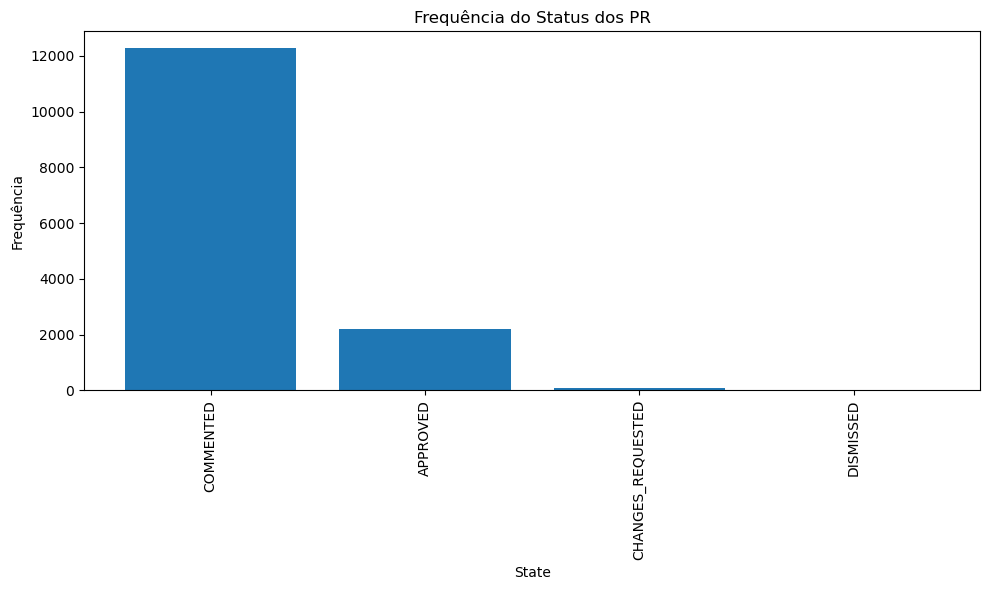

In [19]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['state'], contagem_nomes_df['frequencia'])

# Adicionar rótulos
plt.xlabel('State')
plt.ylabel('Frequência')
plt.title('Frequência do Status dos PR')
plt.xticks(rotation=90)  # Rotacionar os nomes no eixo x para melhor visualização

# Exibir o gráfico
plt.tight_layout()
plt.show()


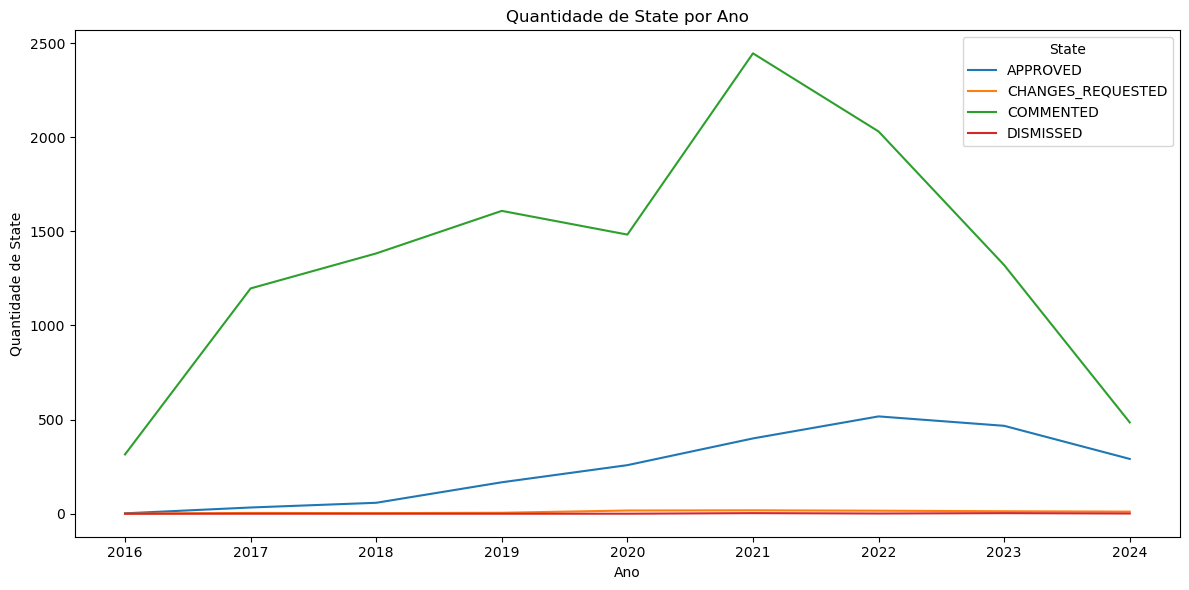

In [12]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano da coluna 'submitted_at'
df_pr['year'] = df_pr['submitted_at'].dt.year

# Contar a quantidade de states por ano
state_counts = df_pr.groupby(['year', 'state']).size().unstack(fill_value=0)

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))

for state in state_counts.columns:
    plt.plot(state_counts.index, state_counts[state], marker='', linestyle='-', label=state)

plt.title('Quantidade de State por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de State')
plt.xticks(state_counts.index)  # Para garantir que todos os anos sejam mostrados
plt.grid(False)  
plt.legend(title='State')
plt.tight_layout()

# Exibir o gráfico
plt.show()